In [136]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

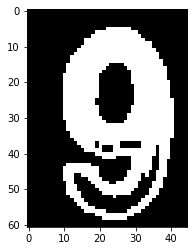

In [142]:
img = cv2.imread('dataset_BallModel/number_binary/test/9_79.jpg')
#ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
img_gray_lp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#img_binary_lp = cv2.erode(img_binary_lp, (4,4))
img_binary_lp = cv2.erode(img_binary_lp, (10,10))
img_binary_lp = cv2.dilate(img_binary_lp, (10,10))


plt.imshow(img_binary_lp, cmap='gray')

In [99]:
def inverte(imagem, name):
    imagem = (255-imagem)
    cv2.imwrite(name, imagem)

In [100]:
imagem = cv2.bitwise_not(img_binary_lp)
cv2.imwrite('lena_opencv_gray.jpg', imagem)

True

0

In [139]:
from skimage import io, color
import os
import imghdr
from random import randrange

source = r'C:\Users\ball_\Python\PlateRegcognization\dataset_BallModel\number'
destination = r'C:\Users\ball_\Python\PlateRegcognization\dataset_BallModel\number_binary'

image_files = [os.path.join(root, filename) 
                   for root, dirs, files in os.walk(source) 
                   for filename in files 
                   if imghdr.what(os.path.join(root, filename))]

for fn in image_files:
    img = cv2.imread(fn)
    img_gray_lp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #img_binary_lp = cv2.erode(img_binary_lp, (4,4))
    img_binary_lp = cv2.erode(img_binary_lp, (1000,1000))
    img_binary_lp = cv2.dilate(img_binary_lp, (1000,1000))
    randomnum = randrange(9)
    #invert color
    imagem = cv2.bitwise_not(img_binary_lp)
    
    head, tail = os.path.split(fn)
    filepath = head.split("\\")
    
#     try: 
#         os.mkdir(filepath[7]) 
#     except OSError as error: 
#         print(error)  
    if randomnum >= 8:
        io.imsave(os.path.join(destination,'test', tail), imagem)
    else:
        io.imsave(os.path.join(destination,'train', tail), imagem)